# <font color= black> **Machine Learning (MATH2319)**</font>

## <font color= black> **Assignment -1**</font> 

### <font color= black> Mohammed Abraar Asif (S3846691) <br> David Ben Gurion Dhanapal (S3859284)</font>

## Introduction:

#### Dataset Source:

The dataset that we use here is the **Pima Indians Diabetes** dataset (Peter D. Turney, 1995) sourced from the OpenML data repository.

#### Dataset Details:

This dataset consists of a total of 768 instances containing 8 descriptive (a.k.a. independent) features and one target (a.k.a. response or dependent) feature which all deal with information relating to the detection of diabetes mellitus in the patients. It is important to note that the instances are all details of patients who are females from 21 years of age and of Pima Indian heritage. The dataset that we are using for this part of the project has not been separated into training and test sets. It is, in fact, done at a later stage. 

#### Dataset Features:

The features in the dataset are explained below:
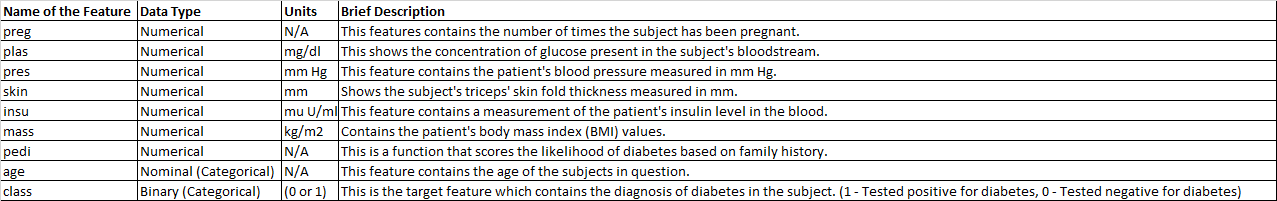

#### Target Feature:

Here, our target feature is **class**, a binary categorical datatype which describes if the patient is diagnosed with diabetes mellitus or not. The two factors of this feature are tested_positive which indicates that the patients has been diagnosed with diabetes and tested_negative which denotes that the patients has been tested negative for diabetes. This is what we will be trying to predict at a later stage in the project.

## Goals and Objectives:

• For this stage in our project, our goal is to prepare the dataset by performing appropriate cleaning and preprocessing on the dataset. We also need to perform some exploration and create appropriate and meaningful visualizations from the dataset features in order to gain relevant information in line with our goal. 

• Our ultimate objective for this project, however, is to try to predict diabetes in patients with an acceptable margin of error by testing out multiple modelling techniques and choosing a best fitting model for our prediction. For this purpose, we will be splitting our dataset into training and test sets at a later stage.

First, we begin by importing the essential packages into the kernel and also run a command to ignore warnings:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
from IPython.display import display, HTML

### 
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

We then read the dataset in the .csv format into a pandas dataframe:

In [2]:
df = pd.read_csv("C:\\Users\\moham\\OneDrive\\Documents\\RMIT\\Courses\\Sem 2\\Machine Learning\\Assignments\\Assignment 1\\dataset_37_diabetes.csv")

## Data Cleaning and Preprocessing:

This is the part where we check our dataset thoroughly for various errors and inconsistencies like outliers and missing or incorrect values. We do appropriate preprocessing and cleaning on the dataset to make sure that the dataset is ready for modelling using various techniques.

#### Renaming the column names:

To make the feature labels more legible, we rename them using the **rename()** function:

In [3]:
df = df.rename(columns={'preg': 'Pregnancy Count', 'plas': 'Plasma Glucose Concentration', 'pres':'Diastolic Blood Pressure', 'skin':'Triceps Skin Fold Thickness','insu':'2-Hour Serum Insulin','mass':'Body Mass Index', 'pedi':'Diabetes Pedigree Function', 'age':'Age','class':'Diagnosis' })

As a next step, we determine the shape of the data and the datatypes of its various features to get a better understanding:

In [4]:
print(f"The shape of the dataset is :\n{df.shape} \n")
print(f"The datatypes of the features/attributes are as follows : \n{df.dtypes}")

The shape of the dataset is :
(768, 9) 

The datatypes of the features/attributes are as follows : 
Pregnancy Count                   int64
Plasma Glucose Concentration      int64
Diastolic Blood Pressure          int64
Triceps Skin Fold Thickness       int64
2-Hour Serum Insulin              int64
Body Mass Index                 float64
Diabetes Pedigree Function      float64
Age                               int64
Diagnosis                        object
dtype: object


As an added step, to improve readability, we round all the real-valued columns to 3 decimal places using the **round()** function:

In [5]:
df = df.round(3)

#### Checking for missing values:

Next, as an important step in any preprocessing, we check if there are any missing values in each induvidual feature with the command shown below:

In [6]:
print(f"\n{df.isnull().sum()}")


Pregnancy Count                 0
Plasma Glucose Concentration    0
Diastolic Blood Pressure        0
Triceps Skin Fold Thickness     0
2-Hour Serum Insulin            0
Body Mass Index                 0
Diabetes Pedigree Function      0
Age                             0
Diagnosis                       0
dtype: int64


We see that our dataset has no missing values and were good to go.

#### Dropping unique-value features:

To make the dataset suitable for various machine learning techniques, we drop ID-like columns containing unique values, if any:

In [7]:
df = df.loc[:, df.nunique() != 1]

#### Dropping rows:
  
If we closely observe the Body Mass Index variable, we would see that there are observations with **0** values, which is an error. We need to handle this either by dropping or imputing values.

In [8]:
df.loc[df['Body Mass Index']<1,].shape[0]

11

There are 11 rows with **0** BMI. These rows can be deleted for producing a clean dataset. This can be done using the inbuilt drop() function.

In [9]:
df = df.drop(df.loc[df['Body Mass Index']<1].index)

#### Discretizing numerical features:

Next, we discretize the numerical feature **Age** into a categorical feature with three categories **('<40', '40-60', '>60')**:

In [10]:
df['Age'] = pd.cut(x=df['Age'], bins=[20,40,60,85], labels=['<40', '40-60', '>60'])
df['Age'] = df['Age'].astype('object')

## Data Exploration and Visualization:

#### Determining the factors of the target feature:

We now determine the unique factors of our target feature **Diagnosis** and conclude that it is a binary categorical feature. At this stage of our project we do not perform one-hot encoding on it still.

In [11]:
print(np.unique(df["Diagnosis"], return_counts=True))

u_df, idx_df = np.unique(df['Diagnosis'], return_counts = True)

print(f"\nUnique diagnosis factors are: {u_df}")

(array(['tested_negative', 'tested_positive'], dtype=object), array([491, 266], dtype=int64))

Unique diagnosis factors are: ['tested_negative' 'tested_positive']


#### Summary Statistics

We move on to summarise our dataset and obtain important information on the continuous numerical features like the mean, standard deviation, minimum and maximum values using the **describe()** function:

In [12]:
display(HTML('<b>Table 1: Summary of Continuous Features:</b>'))
df.describe(include='int64')

,Pregnancy Count,Plasma Glucose Concentration,Diastolic Blood Pressure,Triceps Skin Fold Thickness,2-Hour Serum Insulin
count,757.000000,757.000000,757.000000,757.000000,757.000000
mean,3.844122,121.136063,69.690885,20.774108,80.841480
std,3.369959,32.061428,18.283325,15.908567,115.710818
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000


Here, we use the same **describe()** function but this time we use it to describe the categorical features in the dataframe.

In [13]:
display(HTML('<b>Table 2: Summary of Categorical Features</b>'))
df.describe(include='object')

,Age,Diagnosis
count,757,757
unique,3,2
top,<40,tested_negative
freq,565,491


####  Exploring features:

Since we would like to explore on the discretized categorical feature **Age**, we first determine the type of the feature using the **type()** command and confirm that it is a pandas series type:

In [14]:
type(df['Age'])

pandas.core.series.Series

We check the number of instances for each category in the feature using the **value_counts()** function and then visualize it. We use a histogram for this purpose and we use the **catplot()** function from the **seaborn** module:

In [15]:
print(df['Age'].value_counts())

<40      565
40-60    166
>60       26
Name: Age, dtype: int64


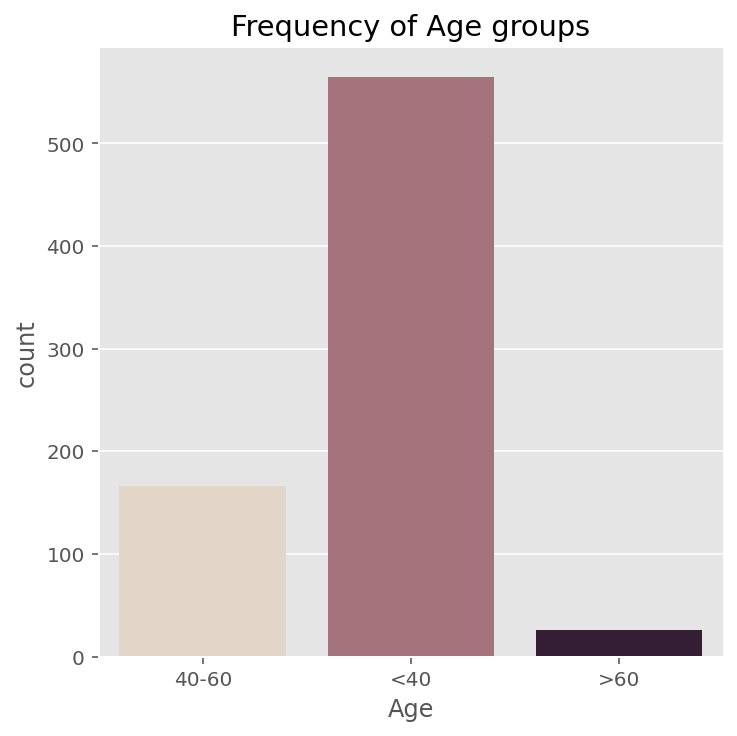

In [16]:
# Histogram of age with kernel density estimate

sns.catplot(x="Age", kind="count", palette="ch:.25", data=df).set(title='Frequency of Age groups')

#### Univariate Exploration and Visualization:

#### One-Variable Plot

A one variable plot is used to visualize the charcteristics of a particular variable for better understanding. There are multiple plots for visualizing single variables such as-

1. Bar plot
2. Histogram
3. Density Plot
4. Box Plot
5. Cat plot etc.



### Catplot

Catplot is a visualization framework of seaborn module. This framework provides the following 8 different types of plots- 

1. stripplot
2. swarmplot
3. boxplot
4. violinplot 
5. boxenplot
6. pointplot()
7. barplot()
8. countplot()

### 1. Frequency plot of Diagnosis:

The first plot of univariate visualization is a frequency (count) plot of the **Diagnosis** variable. Since Diagnosis is a binary data type, this plot helps in visualizing the value counts of tested_positive and tested_negative factors of the variable.

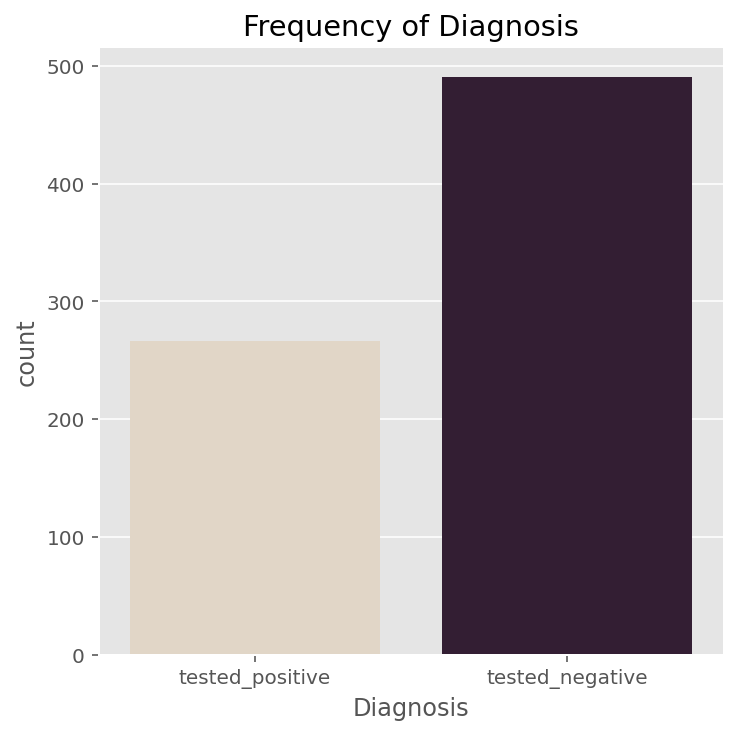

In [17]:
print("\n")
display(HTML('<b>Figure 1: Catplot of Diagnosis:</b>'))
print("\n")
sns.catplot(x="Diagnosis", kind="count", palette="ch:.25", data=df, legend=True).set(title='Frequency of Diagnosis');
plt.show()

**Inference:**  
It is clear from the frequency plot that the number of tested_negative cases are more than the number of tested_positive cases of diabetes. 

### 2. Boxplot of Diabetes Pedigree Function

The second plot of univariate visualization is a boxplot of **Diabetes Pedigree Function** which helps in visualizing the summary statistics of the variable.

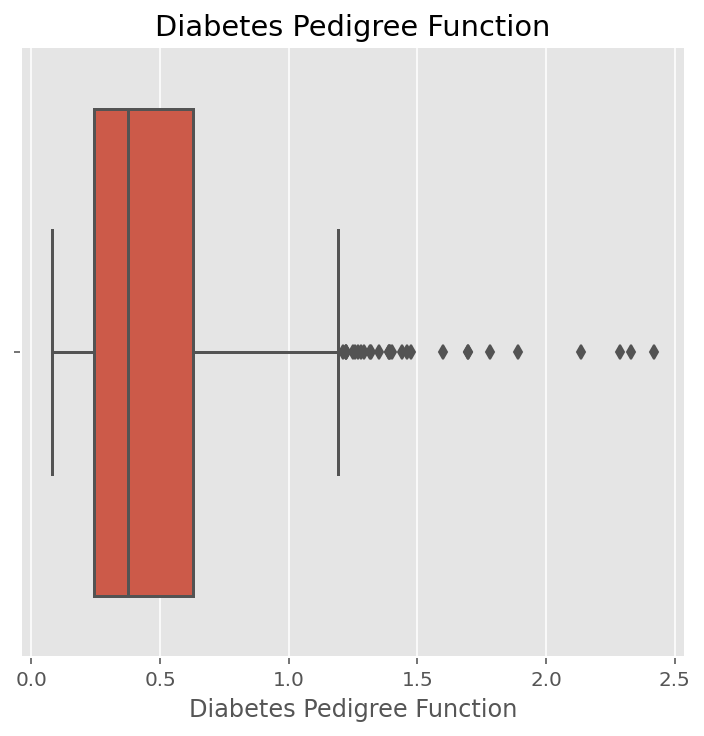

In [18]:
print("\n")
display(HTML('<b>Figure 2: Boxplot of Diabetes Pedigree Function:</b>'))
print("\n")
sns.catplot(x="Diabetes Pedigree Function", kind="box", data=df, legend=True).set(title='Diabetes Pedigree Function');
plt.show()

**Inference:**  
It is clear from the box plot that there are a lot of outliers present in the variable. The following statistical summary's can be approximated using the plot-
1. Median = 0.35
2. Minimum value = 0.1
3. Maximum value = 1.2
4. First Quartile = 0.25
5. Third Quartile = 0.6

### 3. Violin plot of 2-Hour Serum Insulin

Violin plot gives the entire distribution of the numeric variable. Here, a violin plot of **2-Hour Serum Insulin** is used to visualize the distribution of 2-Hour Serum Insulin variable. 

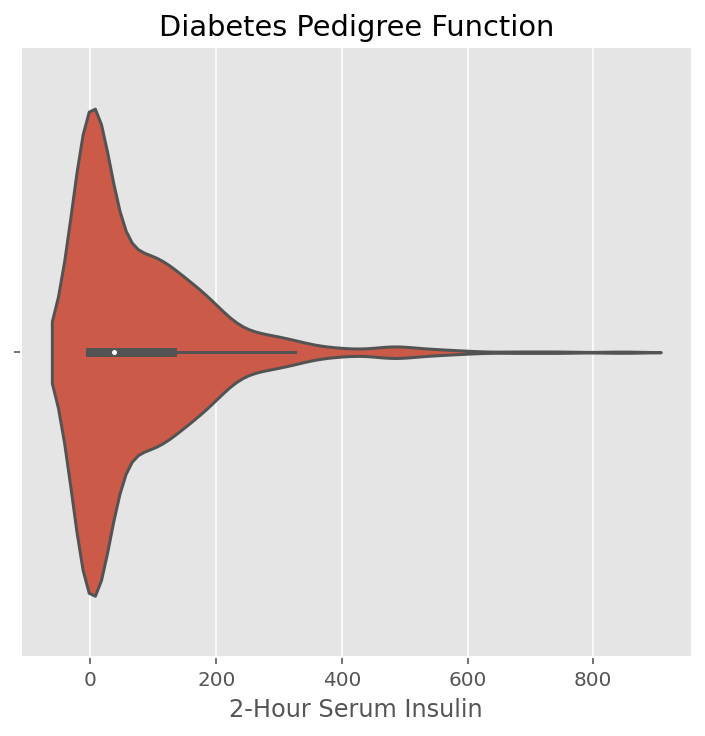

In [19]:
print("\n")
display(HTML('<b>Figure 3: Distplot of 2-Hour Serum Insulin:</b>'))
print("\n")
sns.catplot(x="2-Hour Serum Insulin", kind="violin", data=df, legend=True).set(title='Diabetes Pedigree Function');
plt.show()

**Inference:**  
The violin plot shows that majority of the values are between 0 and 200. This also hints us the possibility of havin outliers in this variable.

## Multivariate Visualization:

A multivariate visualization visualizes a relationship between multiple variables. Such relationships can be useful in fitting a model. 

### Two-variable plot

A two-variable plot establishes a relationship between two variables. Correlation is a very important characteristics of this two-variable plot. We can infer if a variable is positvely/negatively correlated to the other variable. Seaborn’s **jointplot** which is a combination of scatterplot and histogram displays a relationship between 2 variables (bivariate).

### 1. Jointplot of Diastolic blood pressure vs 2-hour serum insulin

Let's visualize a relationship between **Diastolic blood pressure** and **2-hour serum insulin** using a JointPlot.

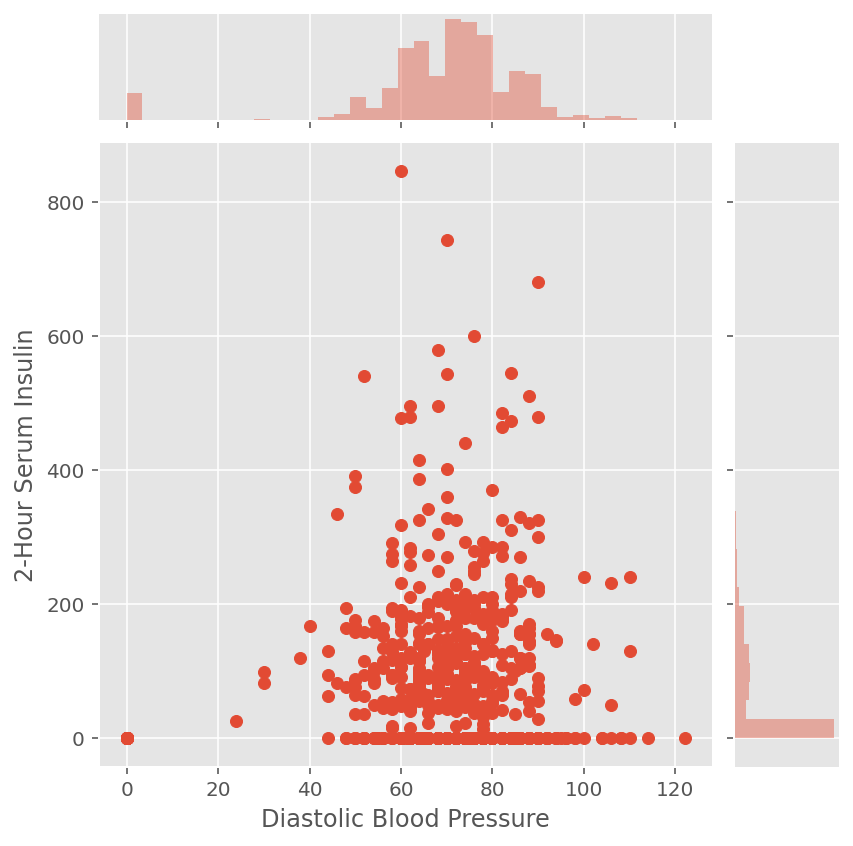

In [20]:
print("\n")
display(HTML('<b>Figure 1: Joint plot of diastolic blood pressure and 2-hour serum insulin:</b>'))
print("\n")
sns.jointplot(x="Diastolic Blood Pressure", y="2-Hour Serum Insulin", data=df);
plt.show()

**Inference:**  
1. Diastolic blood pressure is normally distributed
2. 2-Hour serum insulin is not normally distributed
3. There is no correlation between the two variables.

### 2. Jointplot of Diabetes pedigree function vs Plasma glucose concentration

Let's visualize a relationship between **Diabetes pedigree function** and **Plasma glucose concentration** using a JointPlot.

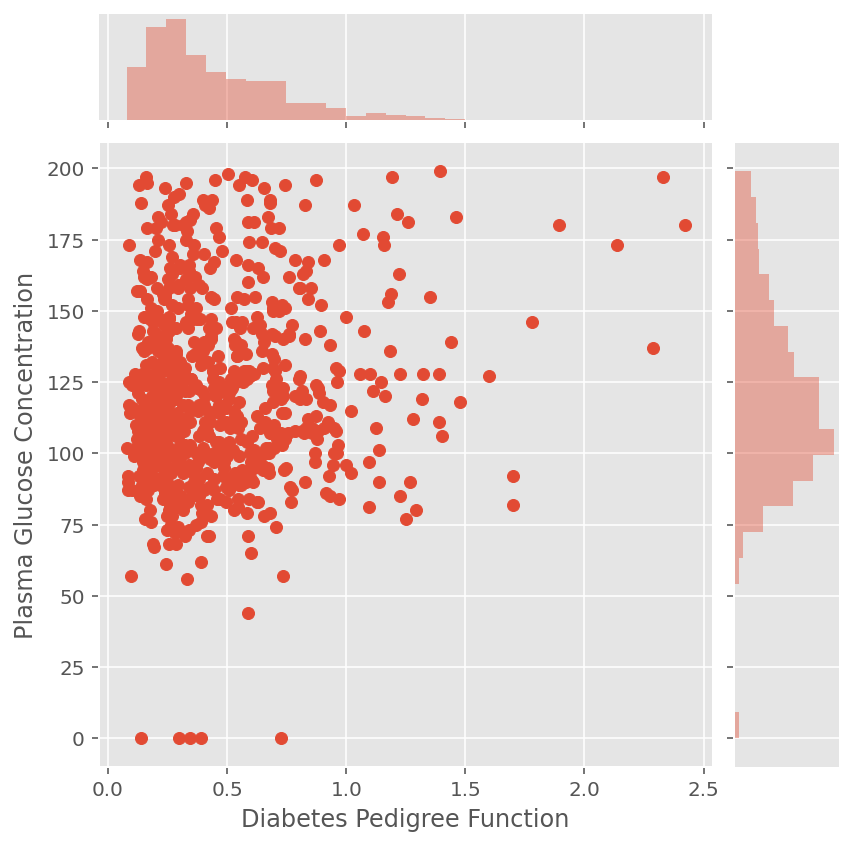

In [21]:
print("\n")
display(HTML('<b>Figure 2: Joint plot of diabetes pedigree function and plasma glucose concentration:</b>'))
print("\n")
sns.jointplot(x="Diabetes Pedigree Function", y="Plasma Glucose Concentration", data=df);
plt.show()

**Inference:**  
1. The plasma glucose concentration is densely populated for low values of diabetes pedigree function.
2. There is no correlation between the two variables

### 3. Jointplot of Triceps skin fold thickness vs Body mass index

Let's visualize a relationship between **Triceps skin fold thickness** and **Body mass index** using a JointPlot.

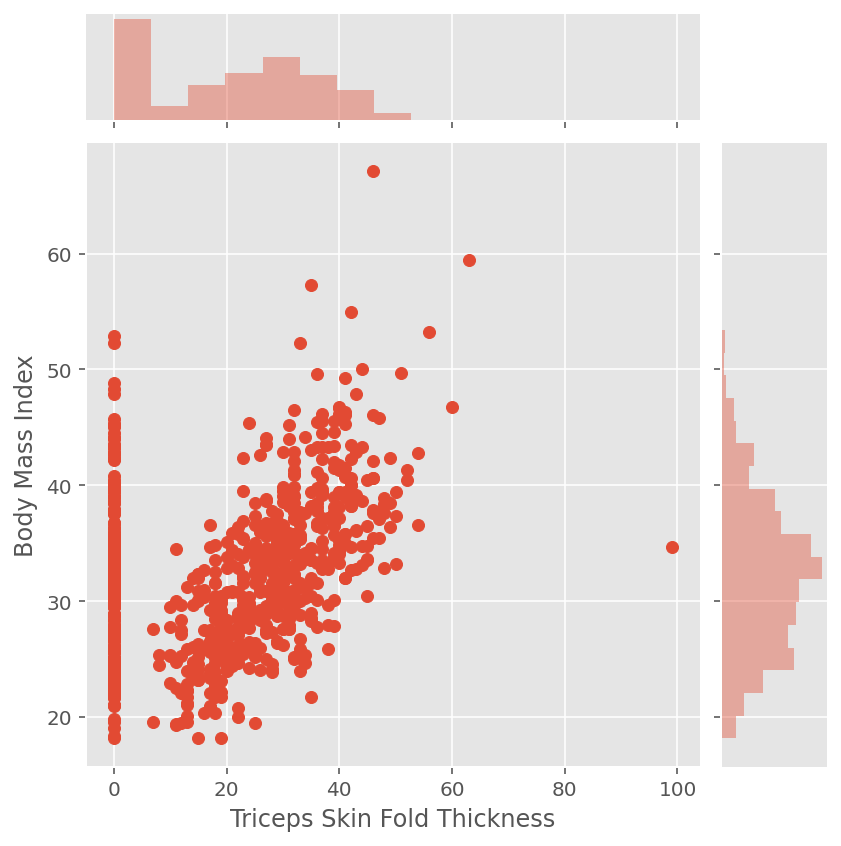

In [22]:
print("\n")
display(HTML('<b>Figure 3: Joint plot of triceps skin fold thickness and body mass index:</b>'))
print("\n")
sns.jointplot(x="Triceps Skin Fold Thickness", y="Body Mass Index", data=df);
plt.show()




**Inference:**  
1. Clearly there is a positive correlation between Triceps skin fold thickness and Body mass index. 
2. From the histogram plot of Body mass index it is evident that majority of the values range between 18 to 48 and is normally distributed.
3. The values of Triceps skin fold thickness are almost normally distributed except for the for the first bin which contains the maximum number of values.

### Three-Variable Plot

A three variable plot establishes a ralationship between three variables. Here, we are visualizing two variables along with the categorical variables **Diagnosis** and **Age**

### 1. Relplot of diastolic blood pressure VS body mass index for the two diagnosis group

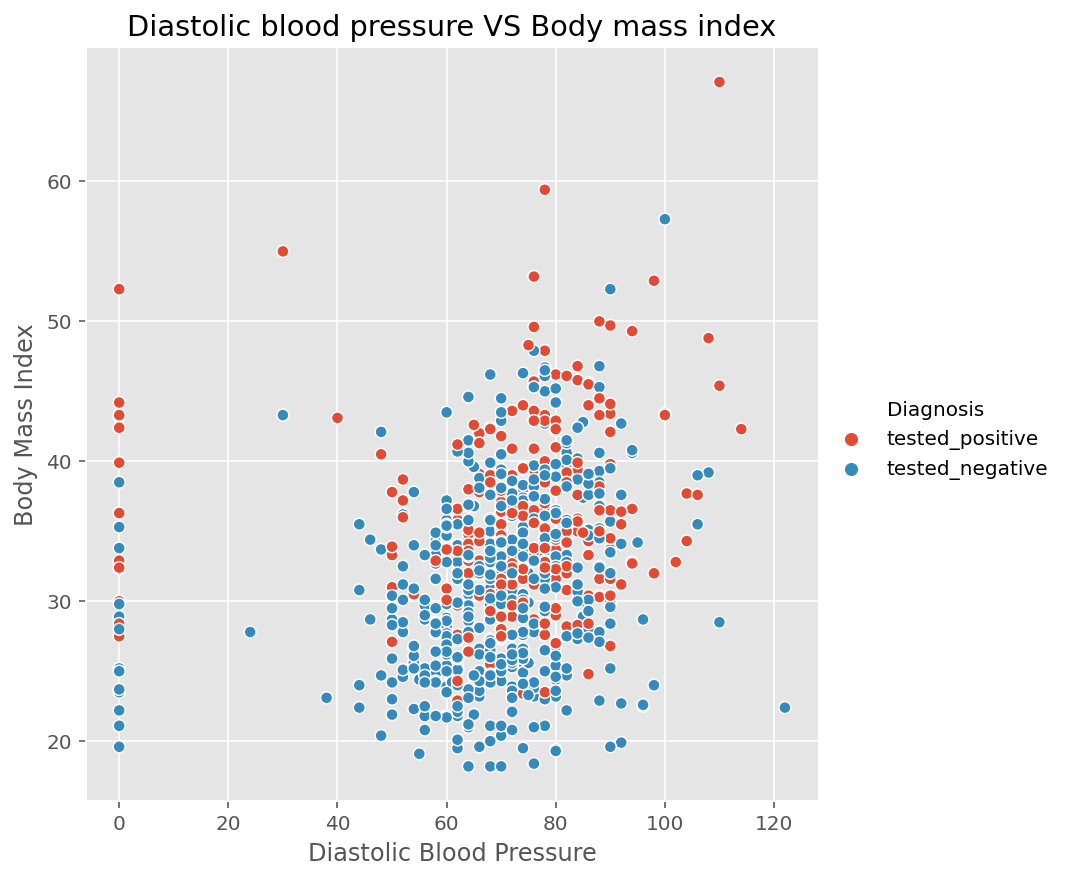

In [23]:
print("\n")
display(HTML('<b>Figure 1: Relplot of diastolic blood pressure and body mass index for the two diagnosis group:</b>'))
print("\n")
sns.relplot(x="Diastolic Blood Pressure", y="Body Mass Index", hue="Diagnosis", height=6, data=df).set(title='Diastolic blood pressure VS Body mass index');
plt.show()

**Inference:**  

### 2. Relplot of 2-Hour Serum Insulin VS Plasma Glucose Concentration for the two diagnosis group

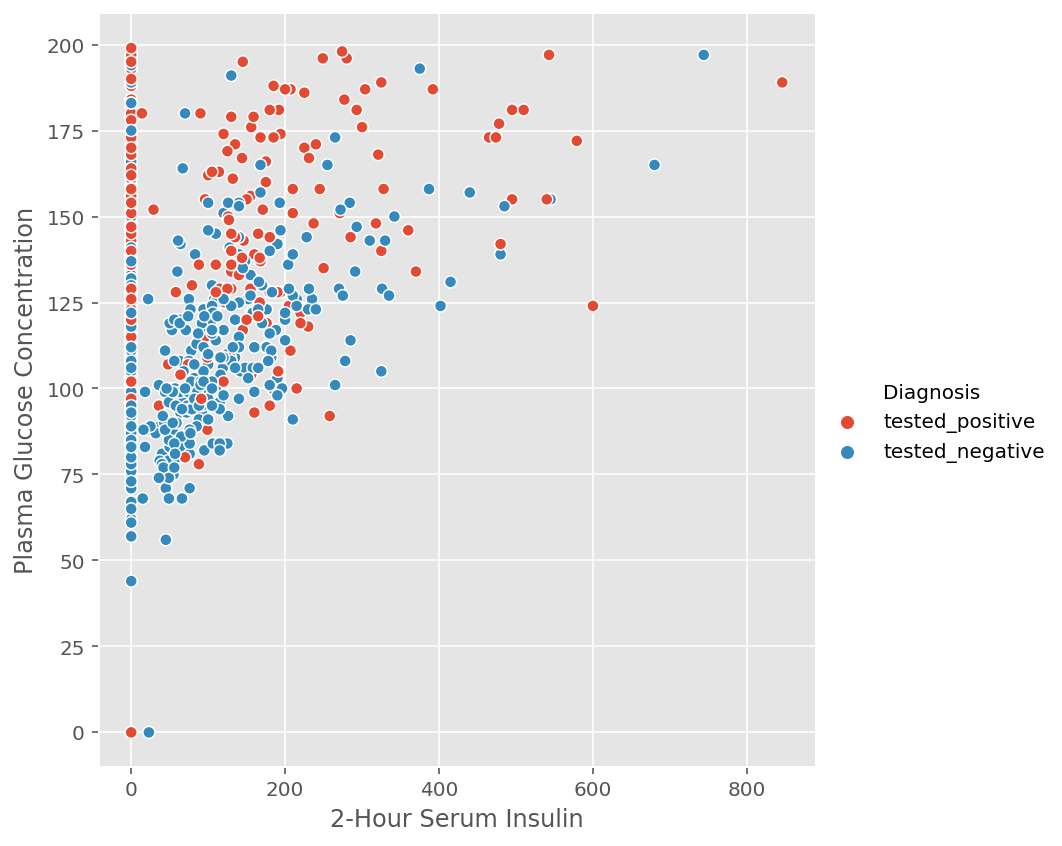

In [24]:
print("\n")
display(HTML('<b>Figure 2: Relplot of 2-Hour Serum Insulin and Plasma Glucose Concentration for the two diagnosis group:</b>'))
print("\n")
sns.relplot(x="2-Hour Serum Insulin", y="Plasma Glucose Concentration", hue="Diagnosis", height=6, data=df);
plt.show()

**Inference:**  

### 3. Relplot plot of Body Mass Index VS Diabetes Pedigree Function

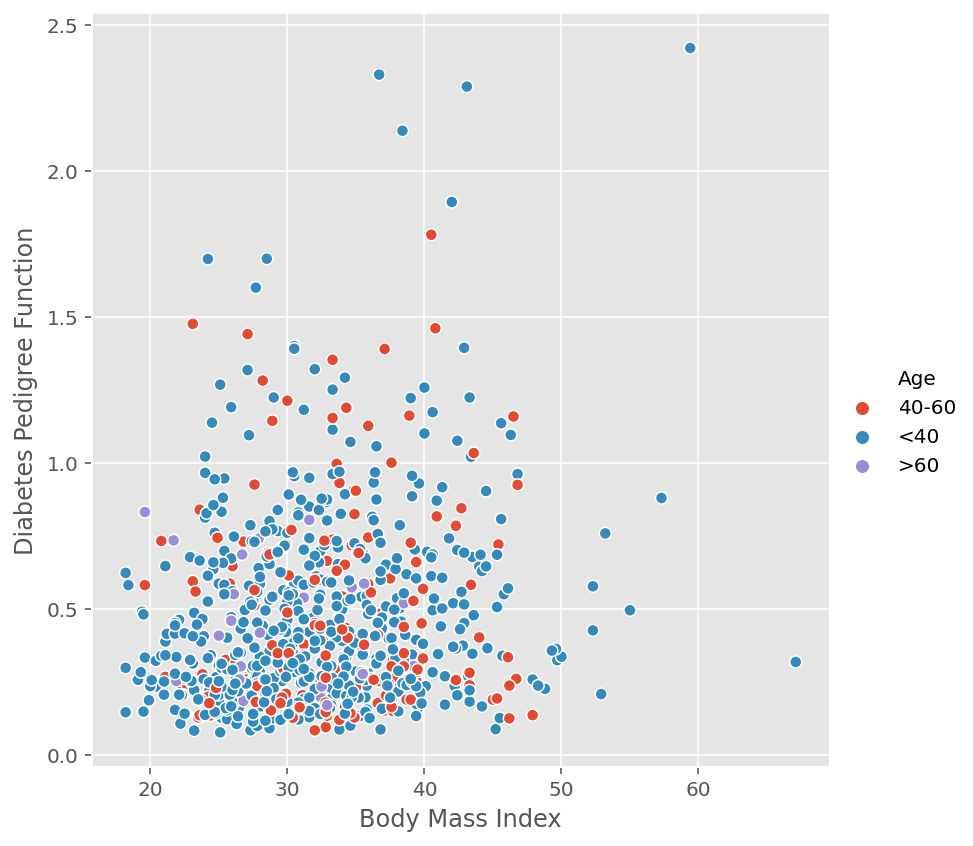

In [25]:
print("\n")
display(HTML('<b>Figure 3: Relplot plot of Body Mass Index and Diabetes Pedigree Function:</b>'))
print("\n")
sns.relplot(x="Body Mass Index", y="Diabetes Pedigree Function", hue="Age", height=6, data=df);
plt.show()

**Inference:**  

In [26]:
# Sampling for train and test data

train = df.sample(500, random_state=999)
test = df[~df.isin(train)].dropna()


### References

#### Dataset:
Turney, Peter D. (1995, March 1). *Pima Indians Diabetes Database*. OpenML. https://www.openml.org/d/37